In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns

%matplotlib inline

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(url, names=["SepalLength","SepalWidth","PetalLength","PetalWidth","Species"])
iris.sample(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
135,7.7,3.0,6.1,2.3,Iris-virginica
34,4.9,3.1,1.5,0.1,Iris-setosa
143,6.8,3.2,5.9,2.3,Iris-virginica
69,5.6,2.5,3.9,1.1,Iris-versicolor
9,4.9,3.1,1.5,0.1,Iris-setosa
103,6.3,2.9,5.6,1.8,Iris-virginica
60,5.0,2.0,3.5,1.0,Iris-versicolor
47,4.6,3.2,1.4,0.2,Iris-setosa
87,6.3,2.3,4.4,1.3,Iris-versicolor
28,5.2,3.4,1.4,0.2,Iris-setosa


In [3]:
iris.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Species        150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


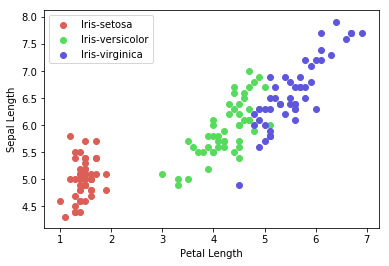

In [5]:
species = iris.Species.unique()
colors = sns.color_palette("hls", 3)
for i, v in enumerate(species):
    df = iris[iris.Species == v]
    plt.scatter(df["PetalLength"],df["SepalLength"], color = colors[i], label = v)
plt.legend(loc = "upper left")
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")

In [6]:
y = np.where(iris.Species == "Iris-virginica", 1, 0)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Sigmoid Activation Function

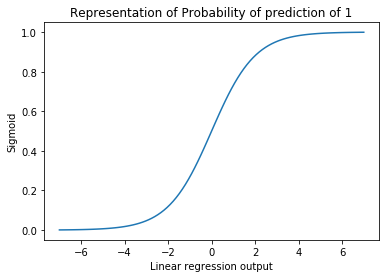

In [7]:
p = np.linspace(-7, 7, 100)
def phi(p):
    return 1 / (1 + np.exp(-p))
plt.plot(p, phi(p))
plt.xlabel("Linear regression output")
plt.ylabel("Sigmoid")
plt.title("Representation of Probability of prediction of 1")

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

from mlxtend.plotting import plot_decision_regions

In [9]:
X = iris.iloc[:, [2, 0]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 340)
X_train.shape

(105, 2)

In [10]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)
outcome = pd.DataFrame({"actual": y_test,"pred": y_test_pred}) 
outcome["match"] = outcome.actual == outcome.pred
outcome

,actual,pred,match
0,0,0,True
1,0,0,True
2,0,1,False
3,1,1,True
4,1,1,True
5,0,0,True
6,0,1,False
7,1,1,True
8,0,0,True
9,0,0,True


In [11]:
accuracy_score(y_test, y_test_pred)

0.91111111111111109

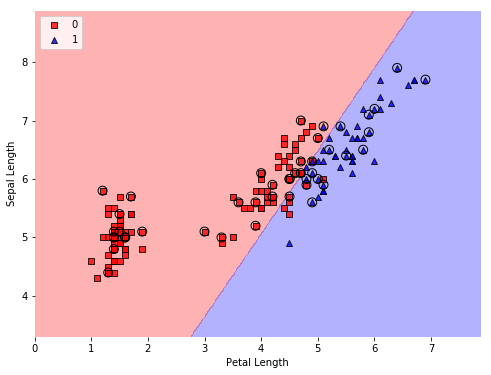

In [12]:
plt.figure(figsize=(8, 6))
plot_decision_regions(X, y, lr, X_highlight = X_test)
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.legend(loc = "upper left")

In [13]:
confusion_matrix(y_test, y_test_pred)

array([[27,  3],
       [ 1, 14]])

In [14]:
accuracy_score(y_test, y_test_pred)

0.91111111111111109

By default, the positive probability > 0.5 is outcome as 1 else 0. What if we want to change the probabilities threshold.

In [15]:
y_test_prob = lr.predict_proba(X_test)[:, 1]
y_test_pred_new = np.where(y_test_prob > 0.8, 1, 0)
print("Accuracy: ", accuracy_score(y_test, y_test_pred_new))
confusion_matrix(y_test, y_test_pred_new)

Accuracy:  0.8


array([[30,  0],
       [ 9,  6]])

So we can observe that as we vary the threshold the accuracy score varies too. But who decides on threshold?

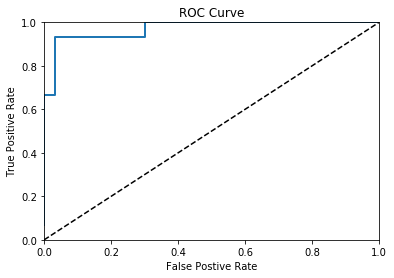

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

plt.plot(fpr, tpr, linewidth = 2)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.plot([0,1], [0,1], ls = "--", color = "k")
plt.xlabel("False Postive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

In [17]:
roc_auc_score(y_test, y_test_prob)

0.97111111111111115

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
scores = cross_val_score(cv=5, scoring="accuracy", estimator=lr, X=X_train, y= y_train)
scores.mean(), scores.std()

(0.95238095238095233, 0.0)

Now, let's use all features availabe to predict the class.

In [20]:
X = iris.values[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
print(X_train.shape)
lr = LogisticRegression(C = 10)
scores = cross_val_score(cv=5, scoring="accuracy", estimator=lr, X=X_train, y= y_train)
scores.mean(), scores.std()

(105, 4)


(0.98095238095238102, 0.038095238095238092)

### Regularization of model using complexity parameter

In [21]:
params = 10 ** np.linspace(-5, 5, 100)
means, stds = [], []
coefs = []

for p in params:
    lr = LogisticRegression(C = p)
    scores = cross_val_score(cv=5, scoring="accuracy", estimator=lr, X=X_train, y= y_train)
    means.append(scores.mean())
    stds.append(scores.std())
    lr.fit(X_train, y_train)
    coefs.append(lr.coef_[0])

means = np.array(means)
stds = np.array(stds)

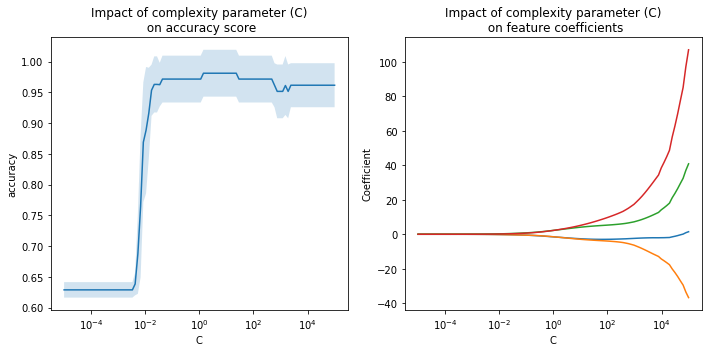

In [22]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(params, means)
plt.fill_between(params, means + stds, means - stds, alpha = 0.2)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.title("Impact of complexity parameter (C)\n on accuracy score")

plt.subplot(1, 2, 2)
plt.plot(params, coefs)
plt.xlabel("C")
plt.ylabel("Coefficient")
plt.xscale("log")
plt.title("Impact of complexity parameter (C)\n on feature coefficients")

plt.tight_layout()

In [23]:
lr = LogisticRegression(C = 10)
lr.fit(X_train, y_train)
lr.coef_[0]

array([-2.60200714, -2.91092027,  4.08857806,  5.13664709])

In [24]:
lr = LogisticRegression(C = 1e-4)
lr.fit(X_train, y_train)
lr.coef_[0]

array([-0.0047881 , -0.00410188,  0.0014221 ,  0.00139863])

### Model Tuning using Grid Search Techqniue

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid = [
    {"C": 10 ** np.linspace(-5, 5, 100)}
]
gs = GridSearchCV(cv=5, estimator = lr, scoring="accuracy", param_grid= param_grid)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': array([  1.00000e-05,   1.26186e-05, ...,   7.92483e+04,   1.00000e+05])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [27]:
best = gs.best_estimator_
print("Best estimator score: ", best.score(X_test, y_test))
print(best.coef_[0])

Best estimator score:  0.955555555556
[-1.68307887 -1.66027479  2.52902693  2.57681463]


In [28]:
gs.best_params_

{'C': 1.4174741629268048}

## Multi Class classification

In [29]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [30]:
X = iris.iloc[:, 0:4].values
y = iris.Species.values
scaler = StandardScaler()
X_std = scaler.fit_transform(X) 
pd.DataFrame(X_std).head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [31]:
le = LabelEncoder()
y = le.fit_transform(y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state = 100)

In [33]:
lr = LogisticRegression(max_iter=100, random_state=100)

param_grid = [
    {"C": 10 ** np.linspace(-5, 5, 100)}
]
gs = GridSearchCV(cv=5, estimator = lr, scoring="accuracy", param_grid= param_grid)
gs.fit(X_train, y_train)
gs.best_params_

{'C': 23.101297000831579}

In [34]:
lr = gs.best_estimator_
lr.intercept_, lr.coef_

(array([-3.16898056, -0.753681  , -7.42016236]),
 array([[-1.02848129,  2.5037609 , -2.73071943, -2.64698775],
        [ 0.4464633 , -1.60984692,  0.77761392, -1.17260505],
        [-0.71255595, -0.76267791,  6.045267  ,  5.84569189]]))

In [35]:
coeffs = pd.DataFrame(np.hstack([lr.intercept_.reshape(-1, 1), lr.coef_]))
coeffs.columns = ["intercept", *iris.columns[0:4]]
coeffs

,intercept,SepalLength,SepalWidth,PetalLength,PetalWidth
0,-3.168981,-1.028481,2.503761,-2.730719,-2.646988
1,-0.753681,0.446463,-1.609847,0.777614,-1.172605
2,-7.420162,-0.712556,-0.762678,6.045267,5.845692


In [36]:
accuracy_score(y_test, lr.predict(X_test))

0.93333333333333335

## Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
X = iris.iloc[:, [2,0]].values
y = iris.Species.values
scaler = StandardScaler()
X_std = scaler.fit_transform(X) 
pd.DataFrame(X_std).head()
le = LabelEncoder()
y = le.fit_transform(y)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
print(X_train.shape)

(105, 2)


In [40]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

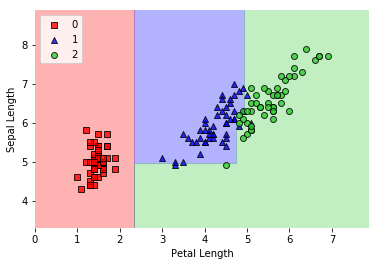

In [41]:
plot_decision_regions(X, y, tree)
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.legend(loc = "upper left")

In [42]:
tree.score(X_test, y_test)

0.93333333333333335

In [43]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9555555555555556

In [44]:
tree.feature_importances_

array([ 0.93007017,  0.06992983])

### Random Forest Classifier

Accuracy: 0.977777777778


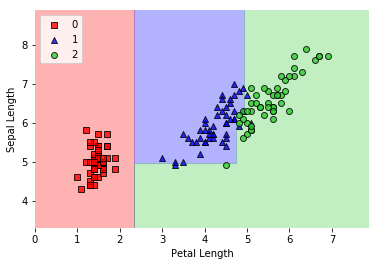

In [45]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=4, random_state=123)
forest.fit(X_train, y_train)
print("Accuracy:", forest.score(X_test, y_test))
plot_decision_regions(X, y, tree)
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.legend(loc = "upper left")

## SVM Classifier

accuracy 0.977777777778


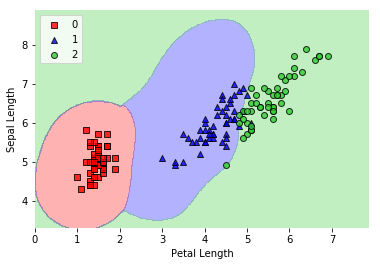

In [46]:
from sklearn.svm import SVC
svc = SVC(gamma=1, kernel="rbf", random_state=345)
svc.fit(X_train, y_train)
print("accuracy", svc.score(X_test, y_test))
plot_decision_regions(X, y, svc)
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.legend(loc = "upper left")